In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
traindf = pd.read_csv('fashion-mnist_train.csv')
testdf = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
traindf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
traindf.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
# define x train and y train

xtrain = traindf.iloc[:, 1:].to_numpy()
ytrain = traindf.iloc[:, 0].to_numpy()


# reshape and normalize xtrain  => (28x28 pixels and 1 is for black and white)
xtrain = xtrain.reshape([-1, 28, 28, 1])
xtrain = xtrain / 255    # so that it is between 0 to 1 (normalization)

In [ ]:
# define xtest and reshape and normalize this as well


xtest = testdf.iloc[:, 1:].to_numpy()
ytest = testdf.iloc[:, 0].to_numpy()


xtest = xtest.reshape([-1, 28,28, 1])
xtest = xtest / 255

In [ ]:
# MODEL


import tensorflow as tf
models = tf.keras.models
layers = tf.keras.layers


model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                346144    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(xtrain, ytrain, epochs=3, validation_split=0.05)

Epoch 1/3
155/155 [==============================] - 5s 28ms/step - loss: 0.8455 - accuracy: 0.7079 - val_loss: nan - val_accuracy: 0.7739
Epoch 2/3
155/155 [==============================] - 5s 34ms/step - loss: 0.5008 - accuracy: 0.8197 - val_loss: nan - val_accuracy: 0.8199
Epoch 3/3
155/155 [==============================] - 4s 27ms/step - loss: 0.4089 - accuracy: 0.8531 - val_loss: nan - val_accuracy: 0.8621


In [ ]:
ypred1 = model.predict(xtest)
ypred = ypred1.argmax(axis = -1)
ypred

163/163 [==============================] - 1s 7ms/step


array([0, 1, 2, ..., 3, 4, 0])

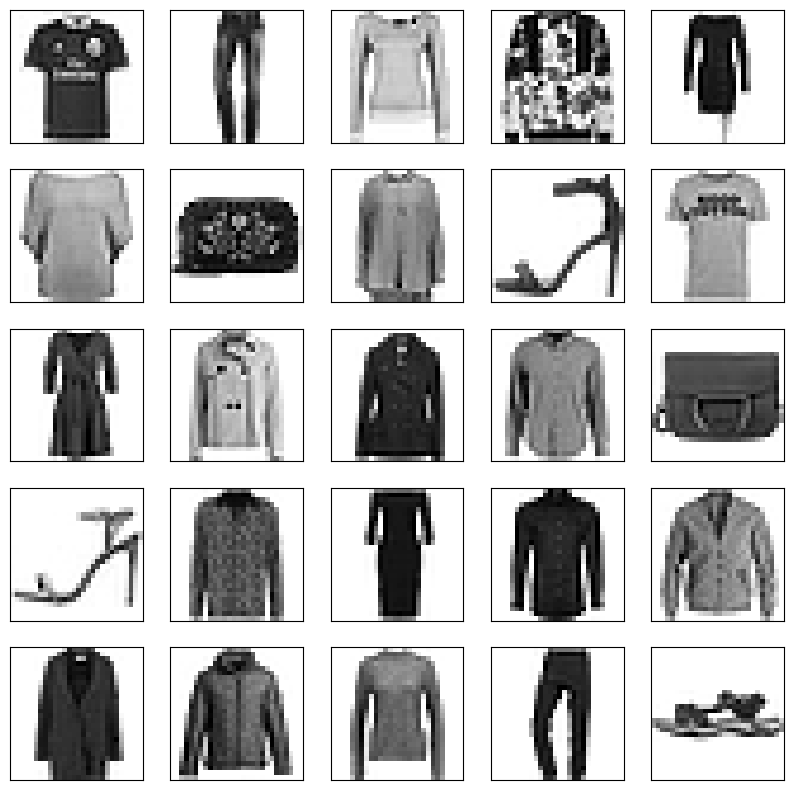

In [ ]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
#    plt.title(f"Pred:{class_names[ypred[i]]}")
plt.show()